# Pandas - Series

What is a Pandas Series?

* A Pandas Series is a fundamental data structure in the Pandas library. It's essentially a one-dimensional labeled array. This means it's similar to a NumPy array (which is also one-dimensional) but with the added feature of having explicit indices (labels) associated with each element. These indices provide a way to access and manipulate the data in a more flexible and intuitive manner than just using numerical positions.
* Think of a Pandas Series as a single column in a spreadsheet or a SQL table.

Key Characteristics of Pandas Series:

* One-Dimensional: It consists of a single sequence of data values.
* Labeled Index: Each element in a Series has a corresponding label, known as its index. By default, Pandas creates a numerical index (0, 1, 2, ...), but you can define custom indices (e.g., dates, names).
* Homogeneous Data (Usually): While a Series can technically hold different data types, it's generally more efficient and common for all elements within a single Series to be of the same data type. Pandas will automatically infer the best data type if not explicitly specified.
* Mutable Data: You can change the values of the elements in a Series after it's created.
* Size-Immutable: While you can modify the data, the size of a Series (the number of elements) is generally fixed once it's created (though you can create new Series by combining or filtering existing ones).
* Supports Vectorized Operations: Like NumPy arrays, Pandas Series support efficient element-wise operations without the need for explicit loops.
* Alignment by Index: One of the most powerful features is that operations between Series automatically align data based on their indices.

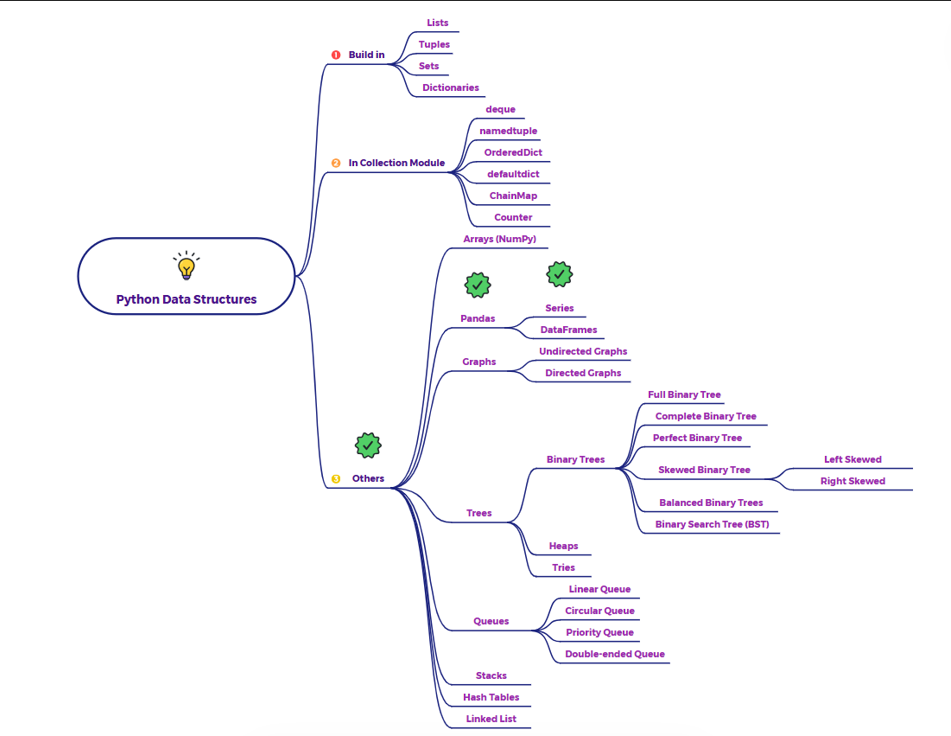


# 1. Define a Utility function to print highlighted characteristics

In [106]:
import pandas as pd
import numpy as np # Often used with pandas for numerical operations

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(description)
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Pandas Series: Daily Stock Prices Example ---")

--- Pandas Series: Daily Stock Prices Example ---


In [107]:
# --- Scenario Setup: Stock Prices ---
# Let's use hypothetical daily closing prices for 'AAPL'

dates = pd.to_datetime(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05'])
prices = [170.10, 171.50, 169.80, 172.30, 171.90]

# Creating a Pandas Series
aapl_prices = pd.Series(prices, index=dates, name='AAPL_Closing_Price')
print(f"Initial AAPL Prices Series:\n{aapl_prices}\n")

Initial AAPL Prices Series:
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    172.3
2025-01-05    171.9
Name: AAPL_Closing_Price, dtype: float64



# 2. One-Dimensional:

* The aapl_prices Series represents a single sequence of values.
* aapl_prices.shape returns (5,), indicating a 1D structure with 5 elements.
* aapl_prices.ndim explicitly states it has 1 dimension.

In [108]:
# 1. One-Dimensional Characteristic

highlight_characteristic(
    "One-Dimensional",
    "A Pandas Series is a one-dimensional labeled array. It's conceptually similar to a column in a spreadsheet or a single column of a DataFrame."
)

print(f"Shape of the Series: {aapl_prices.shape}") # (5,) indicates 1D with 5 elements
print(f"Number of dimensions: {aapl_prices.ndim}") # 1 dimension
print("You can think of it as a single column of values with associated labels.\n")



===== ONE-DIMENSIONAL =====
A Pandas Series is a one-dimensional labeled array. It's conceptually similar to a column in a spreadsheet or a single column of a DataFrame.
===== ONE-DIMENSIONAL =====

Shape of the Series: (5,)
Number of dimensions: 1
You can think of it as a single column of values with associated labels.



# 3. Labeled Index:

* The dates list is passed as the index argument during Series creation, assigning meaningful date labels to each price.
* You can access values using these labels (e.g., aapl_prices['2025-01-03'] or aapl_prices.loc['2025-01-05']).
* Traditional integer-based positional indexing (aapl_prices[0] or aapl_prices.iloc[2]) is also supported.
* Slicing can be done using labels, and it's inclusive of the end label for label-based slicing.

In [109]:
# 2. Labeled Index Characteristic

highlight_characteristic(
    "Labeled Index",
    "Each element in a Series has an associated label (index), allowing data access by label in addition to traditional integer-based positional indexing."
)

print(f"Series Index:\n{aapl_prices.index}")

print("\nAccessing data by label (date):")
print(f"Price on 2025-01-03: {aapl_prices['2025-01-03']}")
# Using .loc for explicit label-based indexing (recommended)
print(f"Price on 2025-01-05 (using .loc): {aapl_prices.loc['2025-01-05']}")

print("\nAccessing data by positional index:")
print(f"Price at position 0: {aapl_prices[0]}")
# Using .iloc for explicit integer-based positional indexing (recommended)
print(f"Price at position 2 (using .iloc): {aapl_prices.iloc[2]}\n")

# Slicing by label (inclusive of end label)
print(f"Prices from Jan 2nd to Jan 4th:\n{aapl_prices['2025-01-02':'2025-01-04']}\n")


===== LABELED INDEX =====
Each element in a Series has an associated label (index), allowing data access by label in addition to traditional integer-based positional indexing.
===== LABELED INDEX =====

Series Index:
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq=None)

Accessing data by label (date):
Price on 2025-01-03: 169.8
Price on 2025-01-05 (using .loc): 171.9

Accessing data by positional index:
Price at position 0: 170.1
Price at position 2 (using .iloc): 169.8

Prices from Jan 2nd to Jan 4th:
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    172.3
Name: AAPL_Closing_Price, dtype: float64



<ipython-input-109-0d8fe55ad800>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Price at position 0: {aapl_prices[0]}")


# 4. Homogeneous Data (Usually):

* The aapl_prices Series has a dtype of float64, meaning all its values are floating-point numbers. This is the common and most efficient use case.
* The mixed_series example shows that if you intentionally put different data types (e.g., int, str, float, bool) into a Series, Pandas will infer a broad object dtype. While possible, it's generally less efficient for numerical operations.

In [110]:
# 3. Homogeneous Data (Usually) Characteristic

highlight_characteristic(
    "Homogeneous Data (Usually)",
    "While a Series *can* technically hold mixed data types (resulting in an 'object' dtype), it is primarily designed for and performs best with homogeneous data (all elements of the same type), like numerical or string data."
)

print(f"Data type (dtype) of aapl_prices: {aapl_prices.dtype}") # Will be float64

# Example of mixed types (resulting in object dtype)
mixed_series = pd.Series([100, "text", 3.14, True])
print(f"Mixed data Series:\n{mixed_series}")
print(f"Data type of mixed_series: {mixed_series.dtype} (object type, indicating mixed types)\n")


===== HOMOGENEOUS DATA (USUALLY) =====
While a Series *can* technically hold mixed data types (resulting in an 'object' dtype), it is primarily designed for and performs best with homogeneous data (all elements of the same type), like numerical or string data.
===== HOMOGENEOUS DATA (USUALLY) =====

Data type (dtype) of aapl_prices: float64
Mixed data Series:
0     100
1    text
2    3.14
3    True
dtype: object
Data type of mixed_series: object (object type, indicating mixed types)



# 5. Mutable Data:

* aapl_prices['2025-01-04'] = 173.50 demonstrates that you can directly modify the value associated with a specific label in the Series after it's created.

In [111]:
# 4. Mutable Data Characteristic

highlight_characteristic(
    "Mutable Data",
    "The values (data) within a Series can be changed after creation."
)

print(f"Original AAPL Prices on 2025-01-04: {aapl_prices['2025-01-04']}")
aapl_prices['2025-01-04'] = 173.50 # Price correction
print(f"Corrected AAPL Prices on 2025-01-04: {aapl_prices['2025-01-04']}")
print(f"Series after data mutation:\n{aapl_prices}\n")


===== MUTABLE DATA =====
The values (data) within a Series can be changed after creation.
===== MUTABLE DATA =====

Original AAPL Prices on 2025-01-04: 172.3
Corrected AAPL Prices on 2025-01-04: 173.5
Series after data mutation:
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    173.5
2025-01-05    171.9
Name: AAPL_Closing_Price, dtype: float64



# 6. Size-Immutable:

* Although you can change data values, you cannot change the number of elements in-place.
* pd.concat() is used to "append" new data. This function actually returns a new Series that combines the old and new data, leaving the original aapl_prices Series unchanged in size.

In [112]:
# 5. Size-Immutable Characteristic

highlight_characteristic(
    "Size-Immutable",
    "The number of elements in a Series is fixed once it's created. Operations that seem to change size (like appending or dropping) typically return a *new* Series, leaving the original unchanged."
)

print(f"Original Series size: {len(aapl_prices)}")

# Appending a new element (creates a new Series)
new_date = pd.to_datetime('2025-01-06')
new_price = 174.00
extended_aapl_prices = pd.concat([aapl_prices, pd.Series([new_price], index=[new_date])])
print(f"\nSeries after appending (new Series created):\n{extended_aapl_prices}")
print(f"Original Series size remains: {len(aapl_prices)}\n") # Original is unchanged


===== SIZE-IMMUTABLE =====
The number of elements in a Series is fixed once it's created. Operations that seem to change size (like appending or dropping) typically return a *new* Series, leaving the original unchanged.
===== SIZE-IMMUTABLE =====

Original Series size: 5

Series after appending (new Series created):
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    173.5
2025-01-05    171.9
2025-01-06    174.0
dtype: float64
Original Series size remains: 5



# 7. Supports Vectorized Operations:

* Operations like aapl_prices.pct_change(), aapl_prices + 0.15, np.log(aapl_prices), and aapl_prices > 172.00 are applied directly to the entire Series.
* Pandas (and NumPy underneath) performs these calculations on all elements very efficiently without requiring explicit Python for loops, which are significantly slower.
* Conditional indexing (e.g., aapl_prices[aapl_prices > 172.00]) is also a powerful vectorized operation.

In [113]:
# 6. Supports Vectorized Operations Characteristic

highlight_characteristic(
    "Supports Vectorized Operations",
    "Pandas Series, built on NumPy, allows for highly efficient element-wise operations without explicit loops. This significantly speeds up numerical computations."
)

print(f"Original AAPL Prices:\n{aapl_prices}")

# Calculate daily returns (simple percentage change)
# (Current_Price - Previous_Price) / Previous_Price
daily_returns = aapl_prices.pct_change() * 100
print(f"\nDaily Percentage Returns:\n{daily_returns.round(2)}") # Round for readability

# Add a flat fee to all prices (scalar operation)
prices_plus_fee = aapl_prices + 0.15
print(f"\nPrices + 0.15 flat fee:\n{prices_plus_fee}")

# Apply a function to each element
log_prices = np.log(aapl_prices)
print(f"\nLogarithm of Prices:\n{log_prices}")

# Conditional filtering
prices_above_172 = aapl_prices[aapl_prices > 172.00]
print(f"\nPrices greater than 172.00:\n{prices_above_172}\n")


===== SUPPORTS VECTORIZED OPERATIONS =====
Pandas Series, built on NumPy, allows for highly efficient element-wise operations without explicit loops. This significantly speeds up numerical computations.
===== SUPPORTS VECTORIZED OPERATIONS =====

Original AAPL Prices:
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    173.5
2025-01-05    171.9
Name: AAPL_Closing_Price, dtype: float64

Daily Percentage Returns:
2025-01-01     NaN
2025-01-02    0.82
2025-01-03   -0.99
2025-01-04    2.18
2025-01-05   -0.92
Name: AAPL_Closing_Price, dtype: float64

Prices + 0.15 flat fee:
2025-01-01    170.25
2025-01-02    171.65
2025-01-03    169.95
2025-01-04    173.65
2025-01-05    172.05
Name: AAPL_Closing_Price, dtype: float64

Logarithm of Prices:
2025-01-01    5.136386
2025-01-02    5.144583
2025-01-03    5.134621
2025-01-04    5.156178
2025-01-05    5.146913
Name: AAPL_Closing_Price, dtype: float64

Prices greater than 172.00:
2025-01-04    173.5
Name: AAPL_Closing_Price, dt

# 8. Alignment by Index:

* When aapl_prices - spy_prices is executed, Pandas automatically matches the dates (indices) between the two Series.
* For dates present in both Series, the subtraction is performed.
* For dates present in one Series but not the other (e.g., '2025-01-06' for aapl_prices or original aapl_prices before the pd.concat for spy_prices), Pandas inserts NaN (Not a Number) to represent the missing alignment, ensuring the resulting Series has a combined index of all unique labels from both input Series.

In [114]:
# 7. Alignment by Index Characteristic

highlight_characteristic(
    "Alignment by Index",
    "When performing operations between two Series, Pandas automatically aligns data based on their indices. If an index label is not found in both Series, the result for that label will be NaN (Not a Number)."
)

# Scenario: Compare AAPL prices with SPY (S&P 500 ETF) prices
spy_dates_full = pd.to_datetime(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06'])
spy_prices_full = [450.00, 451.20, 449.50, 452.80, 451.00, 453.00]
spy_prices = pd.Series(spy_prices_full, index=spy_dates_full, name='SPY_Closing_Price')
print(f"AAPL Prices:\n{aapl_prices}") # Remember AAPL only goes to Jan 5th now after mutation
print(f"\nSPY Prices:\n{spy_prices}") # SPY goes to Jan 6th

# Calculate the difference between AAPL and SPY on common dates
price_difference = aapl_prices - spy_prices
print(f"\nPrice Difference (AAPL - SPY) - note NaN for non-aligned index:\n{price_difference}")
print("On '2025-01-06', AAPL has no data, so the result is NaN. "
      "For common dates, values are aligned and subtracted correctly.\n")

# Another example: common dates for both
common_dates_aapl = aapl_prices.loc['2025-01-01':'2025-01-04']
common_dates_spy = spy_prices.loc['2025-01-01':'2025-01-04']
print(f"AAPL Common Dates:\n{common_dates_aapl}")
print(f"SPY Common Dates:\n{common_dates_spy}")
ratio = common_dates_aapl / common_dates_spy
print(f"\nRatio (AAPL / SPY) on common dates:\n{ratio}\n")



===== ALIGNMENT BY INDEX =====
When performing operations between two Series, Pandas automatically aligns data based on their indices. If an index label is not found in both Series, the result for that label will be NaN (Not a Number).
===== ALIGNMENT BY INDEX =====

AAPL Prices:
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025-01-04    173.5
2025-01-05    171.9
Name: AAPL_Closing_Price, dtype: float64

SPY Prices:
2025-01-01    450.0
2025-01-02    451.2
2025-01-03    449.5
2025-01-04    452.8
2025-01-05    451.0
2025-01-06    453.0
Name: SPY_Closing_Price, dtype: float64

Price Difference (AAPL - SPY) - note NaN for non-aligned index:
2025-01-01   -279.9
2025-01-02   -279.7
2025-01-03   -279.7
2025-01-04   -279.3
2025-01-05   -279.1
2025-01-06      NaN
dtype: float64
On '2025-01-06', AAPL has no data, so the result is NaN. For common dates, values are aligned and subtracted correctly.

AAPL Common Dates:
2025-01-01    170.1
2025-01-02    171.5
2025-01-03    169.8
2025

# COMPLETED